In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import pathlib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Sequential
import matplotlib.image as mpimg
import tensorflow_hub as hub
from tensorflow_hub import KerasLayer
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Now you can import your function
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, walk_through_dir

--2024-04-16 02:10:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-16 02:10:09 (86.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-04-16 02:10:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   210MB/s    in 0.8s    

2024-04-16 02:10:11 (210 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     rotation_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.3,
#     horizontal_flip=True)
# test_datagen = ImageDataGenerator(1 / 255.)

train_dir = './10_food_classes_10_percent/train'
test_dir = './10_food_classes_10_percent/test'

# train_data = train_datagen.flow_from_directory(
#     directory=train_dir,
#     batch_size=BATCH_SIZE,
#     target_size=IMAGE_SHAPE,
#     class_mode="categorical",
#     seed=42,
#     shuffle=True)
# test_data = test_datagen.flow_from_directory(
#     directory=test_dir,
#     batch_size=BATCH_SIZE,
#     target_size=IMAGE_SHAPE,
#     class_mode="categorical",
#     seed=42)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SHAPE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SHAPE,
    label_mode="categorical",
    batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-04-16 02:10:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  94.2MB/s    in 1.4s    

2024-04-16 02:10:18 (94.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
INPUT_SHAPE = (224, 224, 3)
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = (32)

train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    image_size=IMAGE_SHAPE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_percent,
    image_size=IMAGE_SHAPE,
    label_mode="categorical",
    batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
initial_epochs = 5

In [ ]:
# Model 0:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"shape after passing input layer {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after passing global avg layer layer {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("./logs/fit/", "Model_0")])

shape after passing input layer (None, 7, 7, 1280)
shape after passing global avg layer layer (None, 1280)
Saving TensorBoard log files to: ./logs/fit//Model_0/20240416-021028
Epoch 1/5
24/24 [==============================] - 20s 355ms/step - loss: 1.8817 - accuracy: 0.4160 - val_loss: 1.3078 - val_accuracy: 0.7549
Epoch 2/5
24/24 [==============================] - 5s 175ms/step - loss: 1.0988 - accuracy: 0.7493 - val_loss: 0.8874 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - 4s 137ms/step - loss: 0.7852 - accuracy: 0.8280 - val_loss: 0.7055 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - 5s 194ms/step - loss: 0.6456 - accuracy: 0.8480 - val_loss: 0.6245 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 4s 130ms/step - loss: 0.5507 - accuracy: 0.8880 - val_loss: 0.5601 - val_accuracy: 0.8586


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 0.5582 - accuracy: 0.8612


[0.5581550002098083, 0.8611999750137329]

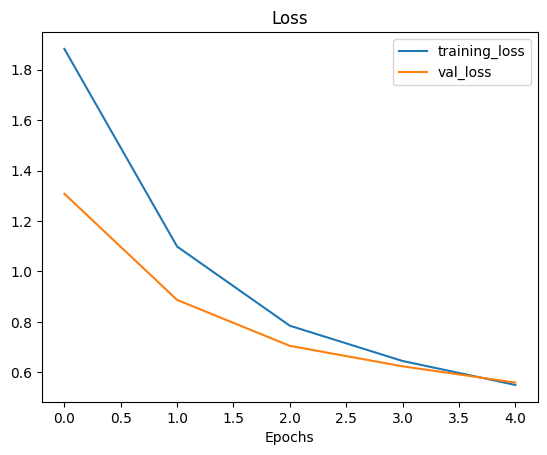

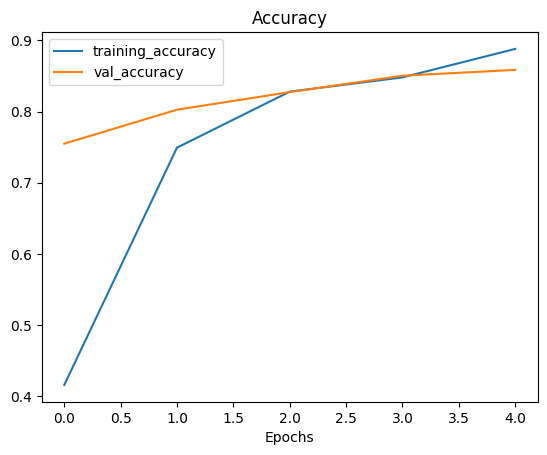

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

global_average_pooled_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)



In [ ]:
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1/255.),
], name="data_augmentation")

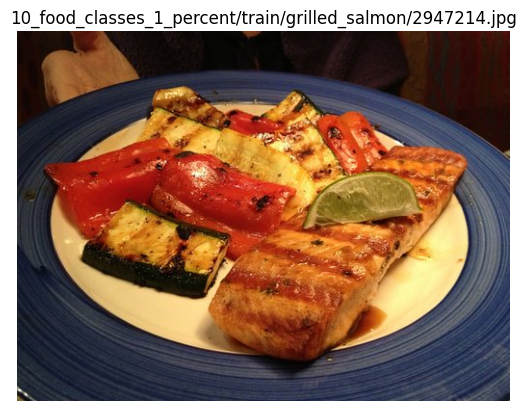

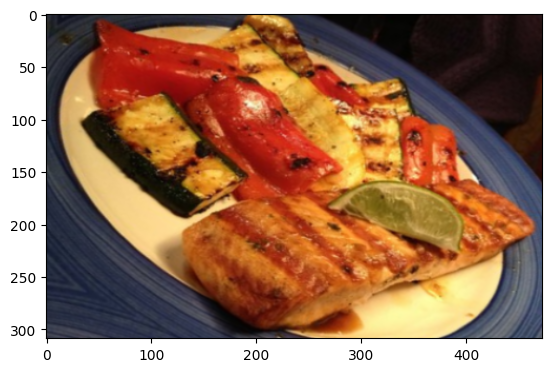

In [ ]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(random_image_path)

augmented_image = data_augmentation(img)
plt.figure()
plt.imshow(augmented_image/255.)

In [ ]:
base_model.trainable = False

inputs = Input(shape=INPUT_SHAPE, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = GlobalAveragePooling2D()(x)

outputs = Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data_1_percent,
            validation_steps=int(0.25 * len(test_data_1_percent)),
            callbacks=[create_tensorboard_callback("./logs/fit/", "Model_1")])

Saving TensorBoard log files to: ./logs/fit//Model_1/20240416-021119
Epoch 1/5
3/3 [==============================] - 14s 2s/step - loss: 2.4053 - accuracy: 0.1286 - val_loss: 2.2129 - val_accuracy: 0.1694
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1152 - accuracy: 0.3000 - val_loss: 2.0655 - val_accuracy: 0.2582
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9276 - accuracy: 0.3429 - val_loss: 1.9702 - val_accuracy: 0.3125
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7288 - accuracy: 0.5143 - val_loss: 1.8483 - val_accuracy: 0.4062
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.5738 - accuracy: 0.6286 - val_loss: 1.7527 - val_accuracy: 0.4803


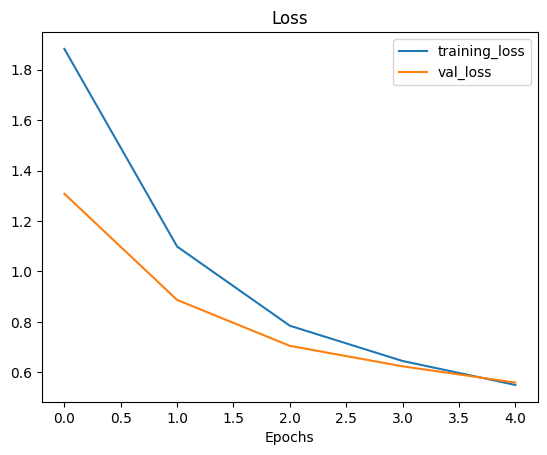

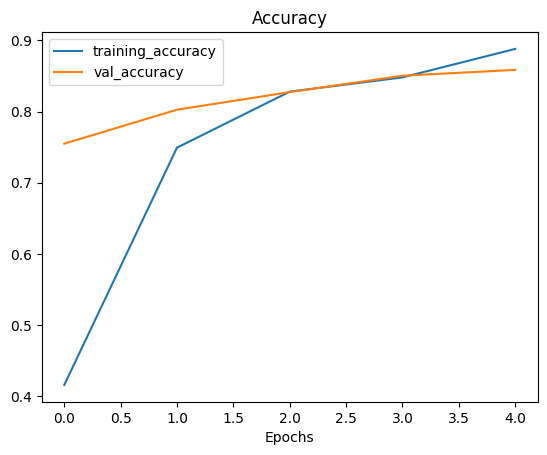

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

In [ ]:
base_model.trainable = False

inputs = Input(shape=INPUT_SHAPE, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = GlobalAveragePooling2D()(x)

outputs = Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback("./logs/fit/", "Model_2")])

Saving TensorBoard log files to: ./logs/fit//Model_2/20240416-021253
Epoch 1/5
24/24 [==============================] - 31s 937ms/step - loss: 1.9832 - accuracy: 0.3533 - val_loss: 1.4426 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - 18s 722ms/step - loss: 1.3078 - accuracy: 0.7013 - val_loss: 0.9872 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - 18s 734ms/step - loss: 0.9951 - accuracy: 0.7707 - val_loss: 0.7994 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - 16s 644ms/step - loss: 0.8380 - accuracy: 0.7893 - val_loss: 0.7108 - val_accuracy: 0.8240
Epoch 5/5
24/24 [==============================] - 16s 659ms/step - loss: 0.7451 - accuracy: 0.7987 - val_loss: 0.6557 - val_accuracy: 0.8207


In [ ]:
base_model.trainable = False

for l in base_model.layers[-10:]:
  l.trainable = True

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_3_Fine = model_2.fit(train_data_10_percent,
            epochs=fine_tune_epochs,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            initial_epoch=history_2.epoch[-1],
            callbacks=[create_tensorboard_callback("./logs/fit/", "Model_3")])

Saving TensorBoard log files to: ./logs/fit//Model_3/20240416-024813
Epoch 5/10
24/24 [==============================] - 23s 609ms/step - loss: 0.6788 - accuracy: 0.8467 - val_loss: 0.6430 - val_accuracy: 0.8257
Epoch 6/10
24/24 [==============================] - 14s 575ms/step - loss: 0.6646 - accuracy: 0.8387 - val_loss: 0.6142 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 14s 551ms/step - loss: 0.6484 - accuracy: 0.8467 - val_loss: 0.6392 - val_accuracy: 0.8289
Epoch 8/10
24/24 [==============================] - 13s 539ms/step - loss: 0.6227 - accuracy: 0.8560 - val_loss: 0.6228 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 15s 604ms/step - loss: 0.6310 - accuracy: 0.8613 - val_loss: 0.6074 - val_accuracy: 0.8355
Epoch 10/10
24/24 [==============================] - 13s 507ms/step - loss: 0.6218 - accuracy: 0.8587 - val_loss: 0.6113 - val_accuracy: 0.8339


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 75ms/step - loss: 0.5816 - accuracy: 0.8468


[0.5816141366958618, 0.8468000292778015]

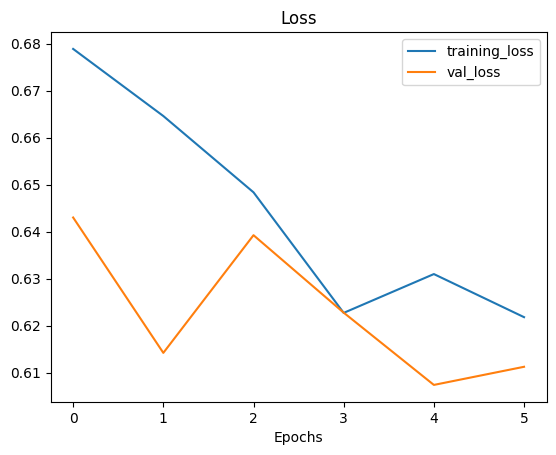

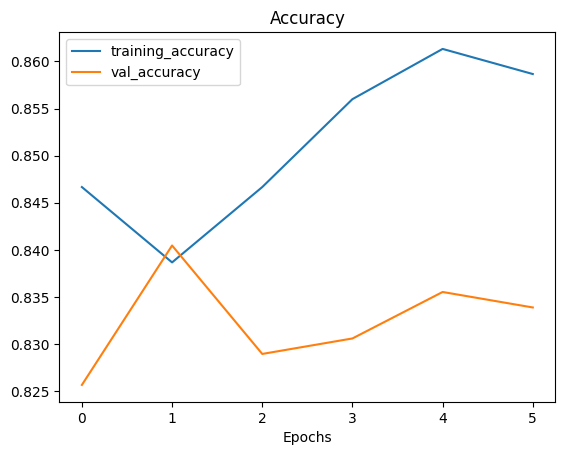

In [ ]:
plot_loss_curves(history_3_Fine)